<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW1-2 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b>Izhikevich model</b></h2>
A model that reproduces spiking and bursting behavior of known types of cortical neurons. The model combines the biologically plausibility of Hodgkin-Huxley-type dynamics and the computational efficiency of integrate-and-fire neurons. Using this model, one can simulate tens of thousands of spiking cortical neurons in real time 

$\frac{d v}{d t}=0.04 v^{2}+5 v+140-u+I_{e x t}$

$\frac{d u}{d t}=a(b v-u)$

$I_{e x t}=h u(t-10)$

**Q1:** Based on the paper of Eugene M. Izhikevich,
$u$ is the membrane recovery variable which the accounts for the activation of potassium ionic
current and inactivation of sodium ionic currents, and it provides negative feedback to $v$.
Also notice that $u$ depends on $v$ as well as $v$ depends on $u$. As $v$ goes up, it is pulled down by $u$ and similarly,
as $u$ goes up it is also pulled down by $u$. So $u$ acts like a recovery variable, and it exists to pull $v$ back down
towards zero.

**Q2:**
- Parameter $a$ describes the timescale of the recovery variable. It is proportional to recovery speed and
smaller values result in slower recovery. A typical value is 0.02.
- Parameter $b$ describes the sensitivity of the recovery variable
to the threshold fluctuations of the membrane potential (v).
Greater values couple and more strongly resulting in possible
subthreshold oscillations and low-threshold spiking dynamics. A typical value is 0.2 .
The case where we have $ a > b $ corresponds to the saddle-node bifurcation in the resting state
and $ b > a $ is Andronov-Hopf bifurcation in the resting state.
- Parameter $c$ describes the after-spike reset value of v caused by the fast high-threshold conductance.
A typical value of -65mV.
- Parameter $d$ corresponds to the after-spike reset of u caused by slow high-threshold and conductance.
A typical value of 2 .
These parameters help us model the different firing patterns, such as neocortical and thalamic neuron activities.


**Q3:** generate 5 different patterns of spiking by altering a, b, c, d and h.
Its simulation is similar to Hodgkin-Huxley model and uses euler method to calculate
dv and du in each step and update V and U. Plus that if V was greater than a
specific threshold, it would generate a spike.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

dt = 0.01  # Simulation time step
Duration = 100  # Simulation length
T = int(np.ceil(Duration / dt))
t = np.arange(1, T + 1) * dt  # Simulation time points in ms
vRest = -60  # in mv, resting potential
vThresh = 30  # in mv
V = vRest * np.ones(T)  # Vector of output voltage
U = np.zeros(T)

def plot_pattern(a, b, c, d, h):
    U[0] = b * V[0]
    I = h * np.heaviside((t - 10), 0)

    for i in range(1, len(t)):
        dv = (0.04 * V[i - 1] ** 2) + (5 * V[i - 1]) + 140 - U[i - 1] + I[i - 1]
        du = a * (b * V[i - 1] - U[i - 1])

        V[i] = V[i - 1] + dv * dt
        U[i] = U[i - 1] + du * dt

        if V[i] > vThresh:
            # spike
            V[i] = c
            U[i] += d

    plt.plot(t, V)
    plt.show()
    return U, V

***Tonic Spiking:***  $a = 0.02$, $b = 0.20$, $c = -65$, $d = 2$, $h = 15$

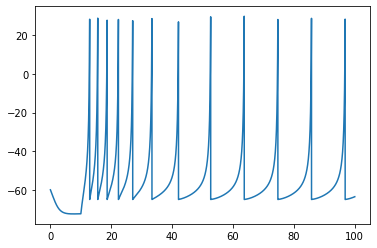

(array([-12.        , -12.        , -12.0000016 , ...,  -1.90099783,
         -1.90316066,  -1.90532277]),
 array([-60.        , -60.04      , -60.08007936, ..., -63.57555791,
        -63.5685852 , -63.56159684]))

In [3]:
plot_pattern(0.02, 0.20, -65, 2, 15)

We can clearly see that the frequency of spikes decreaces after some time.

***Phasic Spiking:*** $a = 0.02$, $b = 0.25$, $c = -65$, $d = 6$, $h = 1$

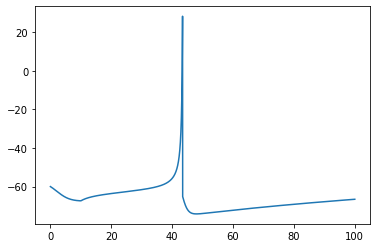

(array([-15.        , -15.        , -15.0000005 , ..., -14.70896275,
        -14.70934938, -14.70973587]),
 array([-60.        , -60.01      , -60.02001996, ..., -66.56836238,
        -66.56715213, -66.56594194]))

In [4]:
plot_pattern(0.02, 0.25, -65, 6, 1)

It spikes only once and then stays in the resting potential.

***Tonic Bursting:*** $a = 0.02$, $b = 0.20$, $c = -50$, $d = 2$, $h = 15$

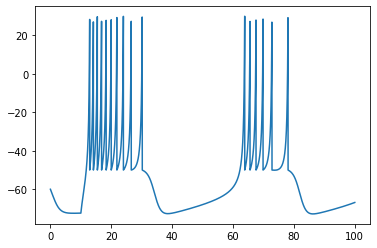

(array([-12.        , -12.        , -12.0000016 , ...,  -1.07829857,
         -1.08075816,  -1.08321701]),
 array([-60.        , -60.04      , -60.08007936, ..., -66.88111612,
        -66.87515547, -66.86919109]))

In [5]:
plot_pattern(0.02, 0.2, -50, 2, 15)

This neuron spikes with a high frequency then goes to the resting potential and then after some time spikes again with a high frequency and keeps doing this in periods.

***Phasic Bursting:*** $a = 0.02$, $b = 0.25$, $c = -55$, $d = 0.05$, $h = 0.6$

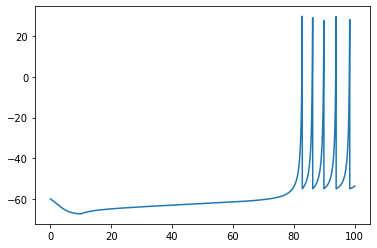

(array([-15.        , -15.        , -15.0000005 , ..., -13.75073253,
        -13.75066822, -13.75060327]),
 array([-60.        , -60.01      , -60.02001996, ..., -53.71669003,
        -53.70382409, -53.69086833]))

In [39]:
plot_pattern(0.02, 0.25, -55, 0.05, 0.7)


I had to slightly change the h value here for the spikes to get generated.

***Mixed Model:*** a = 0.02, b = 0.20, c = -55, d = 4, h = 10

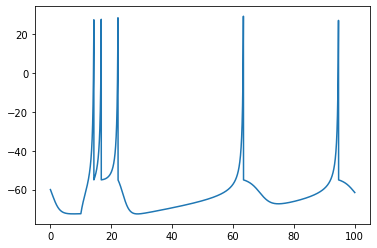

(array([-12.        , -12.        , -12.0000016 , ...,  -4.30582086,
         -4.30741897,  -4.30901752]),
 array([-60.        , -60.04      , -60.08007936, ..., -61.48185041,
        -61.50087755, -61.51990406]))

In [8]:
plot_pattern(0.02, 0.2, -55, 4, 10)

First we see a burst behavior and then tonic spiking pattern.

Q4: phasic spiking pattern

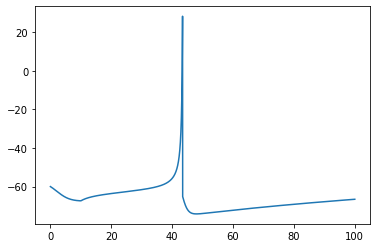

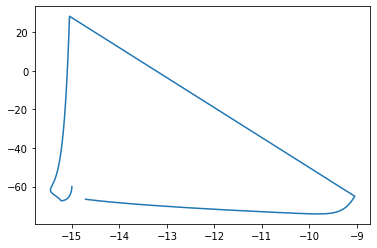

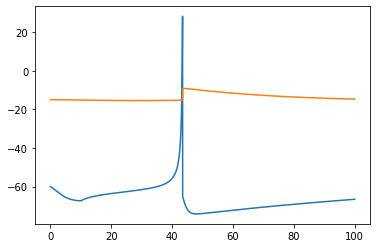

In [9]:
u, v = plot_pattern(0.02, 0.25, -65, 6, 1)
plt.plot(u, v)
plt.show()
plt.plot(t, v)
plt.plot(t, u)
plt.show()

We can see that $v$ starts from around -60 while u starts from around -15. Their value remains almost the same for 
about the first 40ms. Then $v$ starts to rise because of the spike that just happened and then with $a$ and $b$ both 
being positive, it pulls up $u$ and $u$ starts to increase as well. However, with $u$ starting to increase it has a 
negative impact on $du$ and $dv$. Hence, it pulls them down and they both start to decrease. 